In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Business Case:**<br />
The dataset consists of various of images of rice leafs.Each image constitutes to one of the three diseases among LeafSmut,Brown spot and Bacterial Leaf Blight.<br />
The objective is to build a deep learning model to detect what type of disease the rice leaf is having.

In [ ]:
#Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
#importing the files

In [ ]:
labels=pd.read_csv('drive/MyDrive/Rice Leaf/train_labels.csv')

In [ ]:
labels

,filenames,disease
0,DSC_002.jpg,Bacterial_leaf_blight
1,DSC_003.JPG,Bacterial_leaf_blight
2,DSC_005.JPG,Bacterial_leaf_blight
3,DSC_006.JPG,Bacterial_leaf_blight
4,DSC_007.JPG,Bacterial_leaf_blight
...,...,...
2968,FSC_235.jpg,Leaf_smut
2969,FSC_236.jpg,Leaf_smut
2970,FSC_237.jpg,Leaf_smut
2971,FSC_238.jpg,Leaf_smut


In [ ]:
#Lets do quick basic check on labels
labels.describe()

,filenames,disease
count,2973,2973
unique,2973,3
top,DSC_002.jpg,Bacterial_leaf_blight
freq,1,1006


In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filenames  2973 non-null   object
 1   disease    2973 non-null   object
dtypes: object(2)
memory usage: 46.6+ KB


In [ ]:
labels['disease'].value_counts()

Bacterial_leaf_blight    1006
Brown_spot               1005
Leaf_smut                 962
Name: disease, dtype: int64

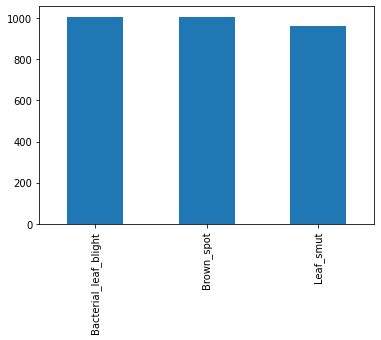

In [ ]:
labels['disease'].value_counts().plot(kind='bar')
plt.show()

There are 40 images each for Bacterial leaf blight and Brown spot and 39 images of Leaf Smut disease.

In [ ]:
#Lets see some of our rice leaf images

In [ ]:
from IPython.display import Image

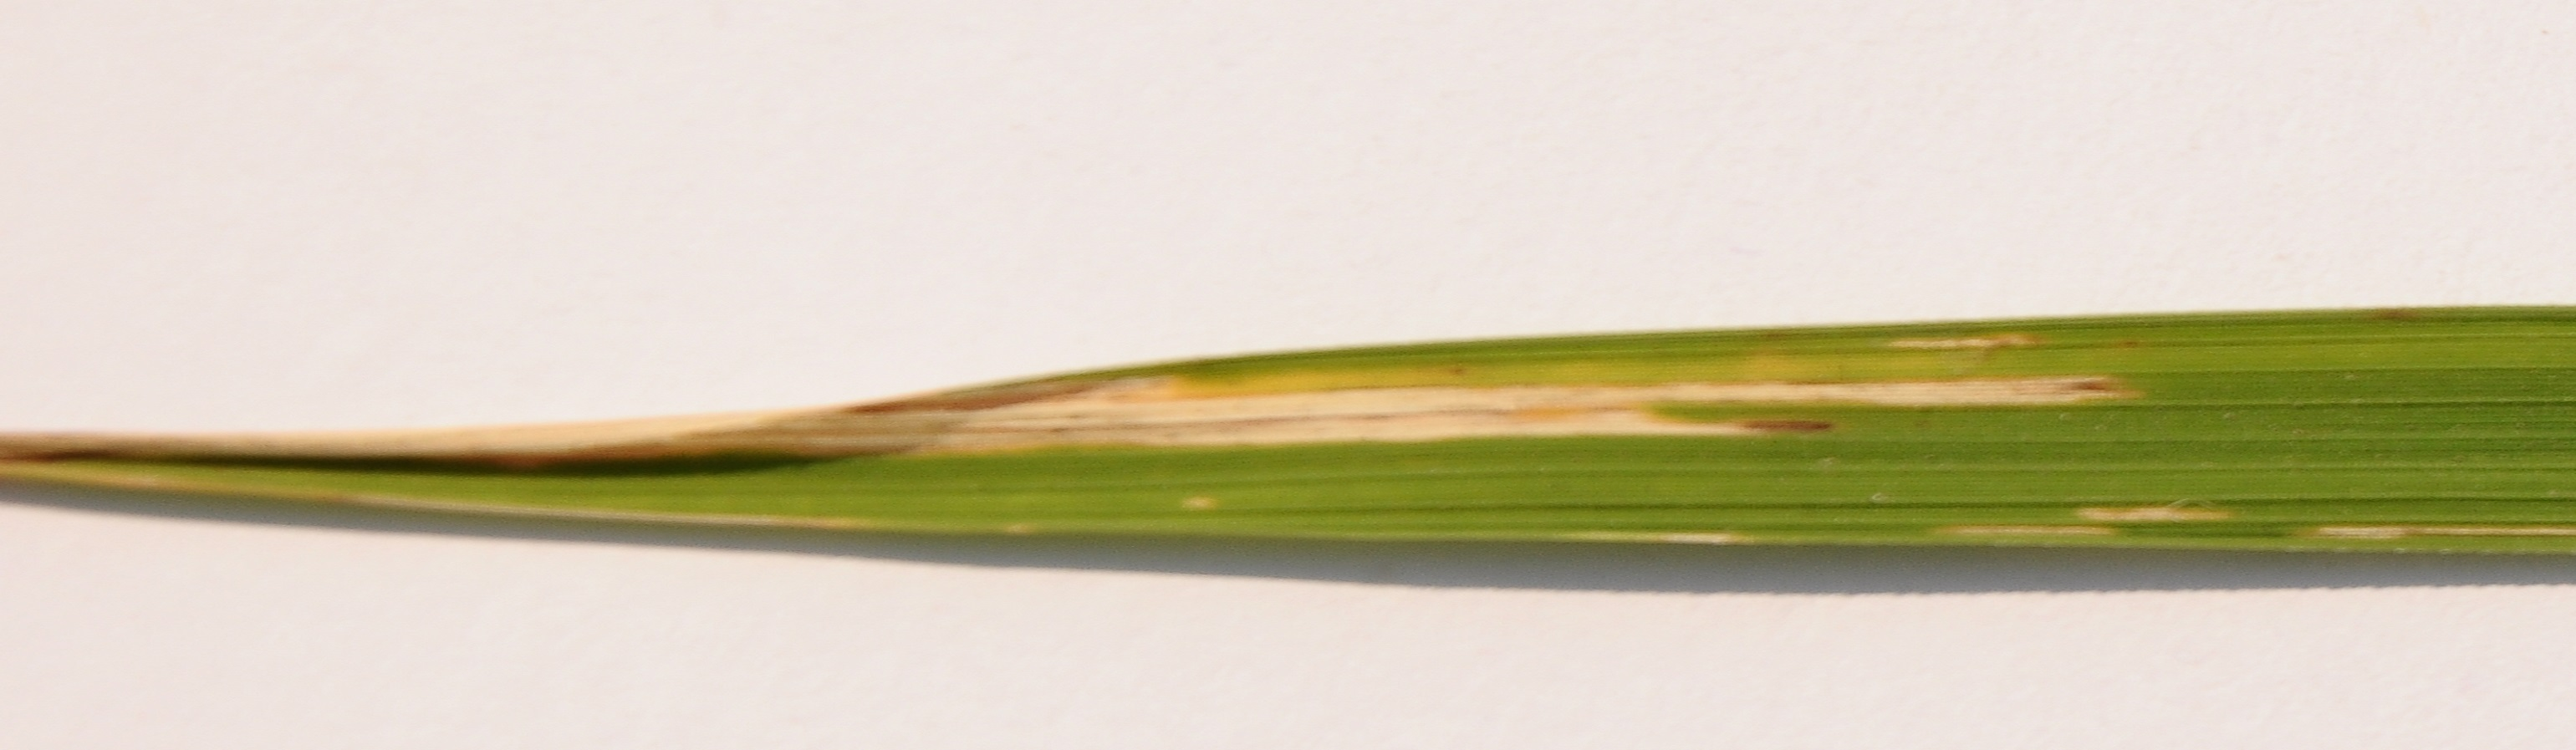

In [ ]:
Image('drive/MyDrive/Rice Leaf/Labelled/DSC_017.JPG')

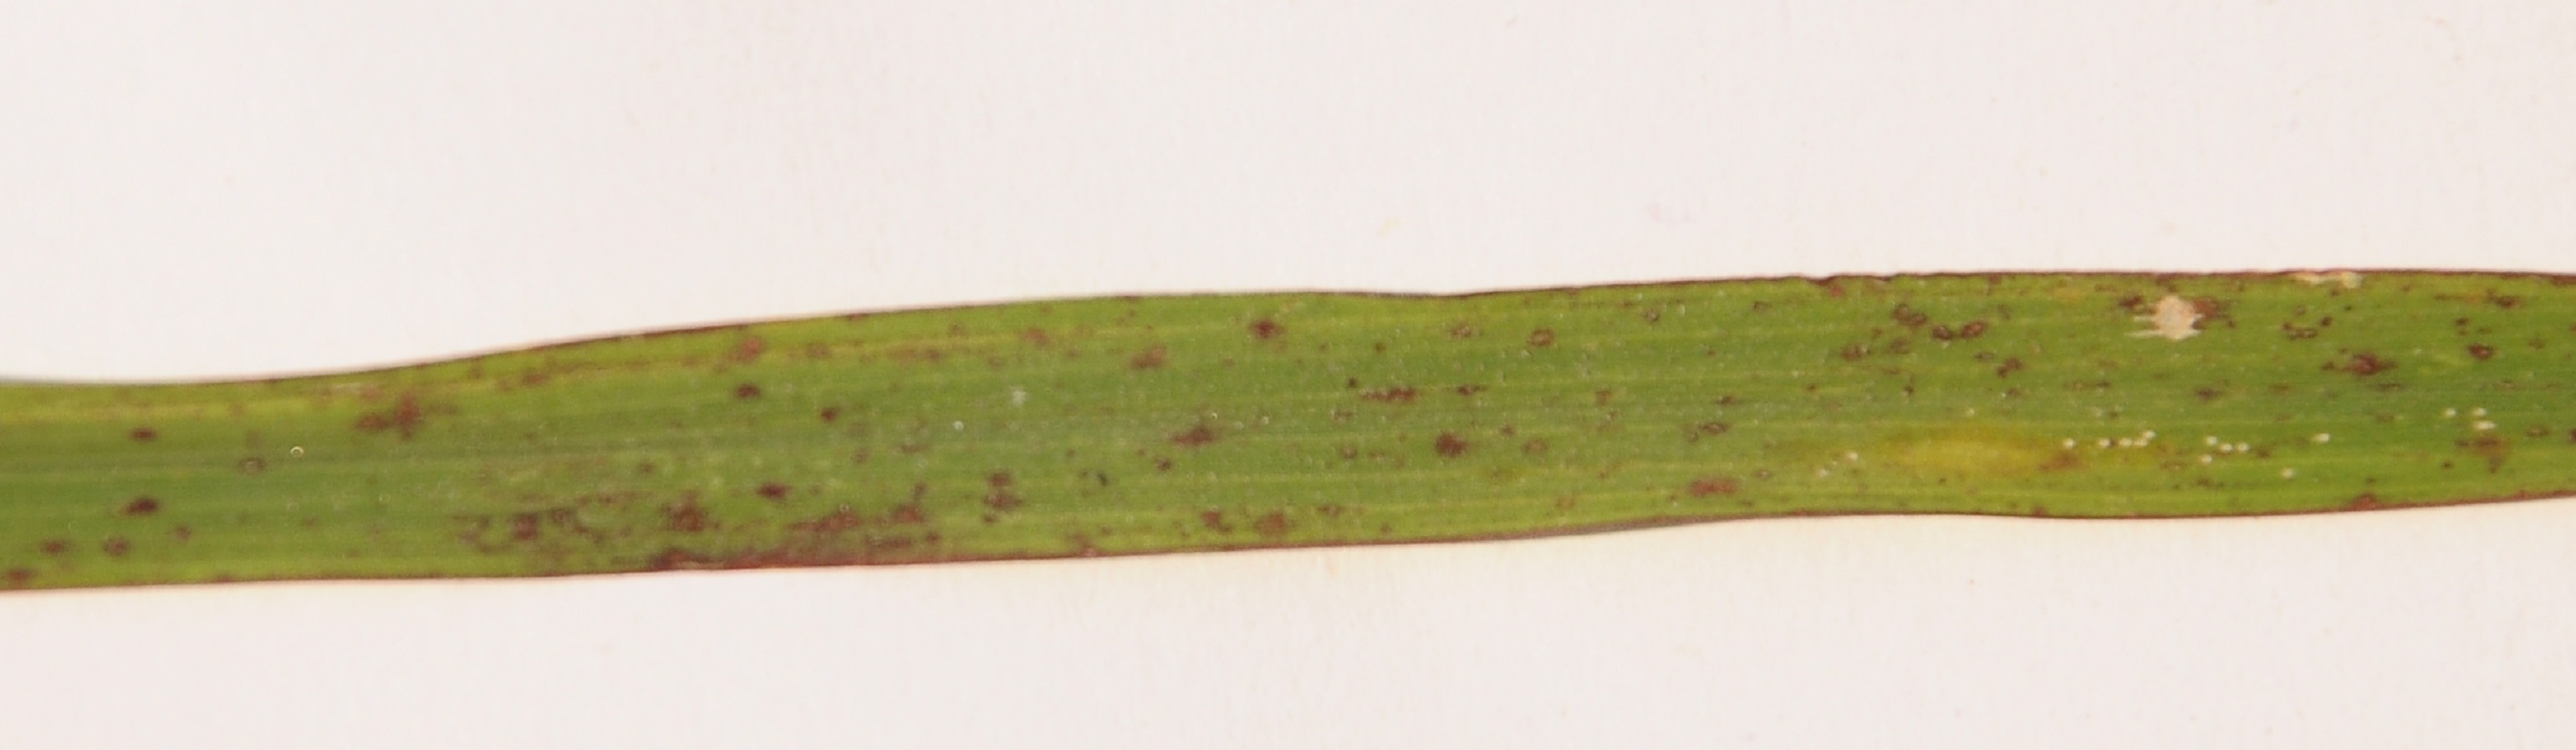

In [ ]:
Image('drive/MyDrive/Rice Leaf/Labelled/FSC_205.JPG')

###Lets create an array of the filenames along with path

In [ ]:
filenames=['drive/MyDrive/Rice Leaf/Labelled/'+i for i in labels['filenames']]

In [ ]:
filenames[:10]

['drive/MyDrive/Rice Leaf/Labelled/DSC_002.jpg',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_003.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_005.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_006.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_007.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_008.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_010.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_012.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_013.JPG',
 'drive/MyDrive/Rice Leaf/Labelled/DSC_014.JPG']

In [ ]:
#Lets see if the number of filenames and the total number of images in the folder matches or not

In [ ]:
from textwrap import fill
import os

if len(os.listdir('drive/MyDrive/Rice Leaf/Labelled'))==len(filenames):
  print('Number of images match number of filenames')
else:
  print('error')


Number of images match number of filenames


Lets visualize some images and labels

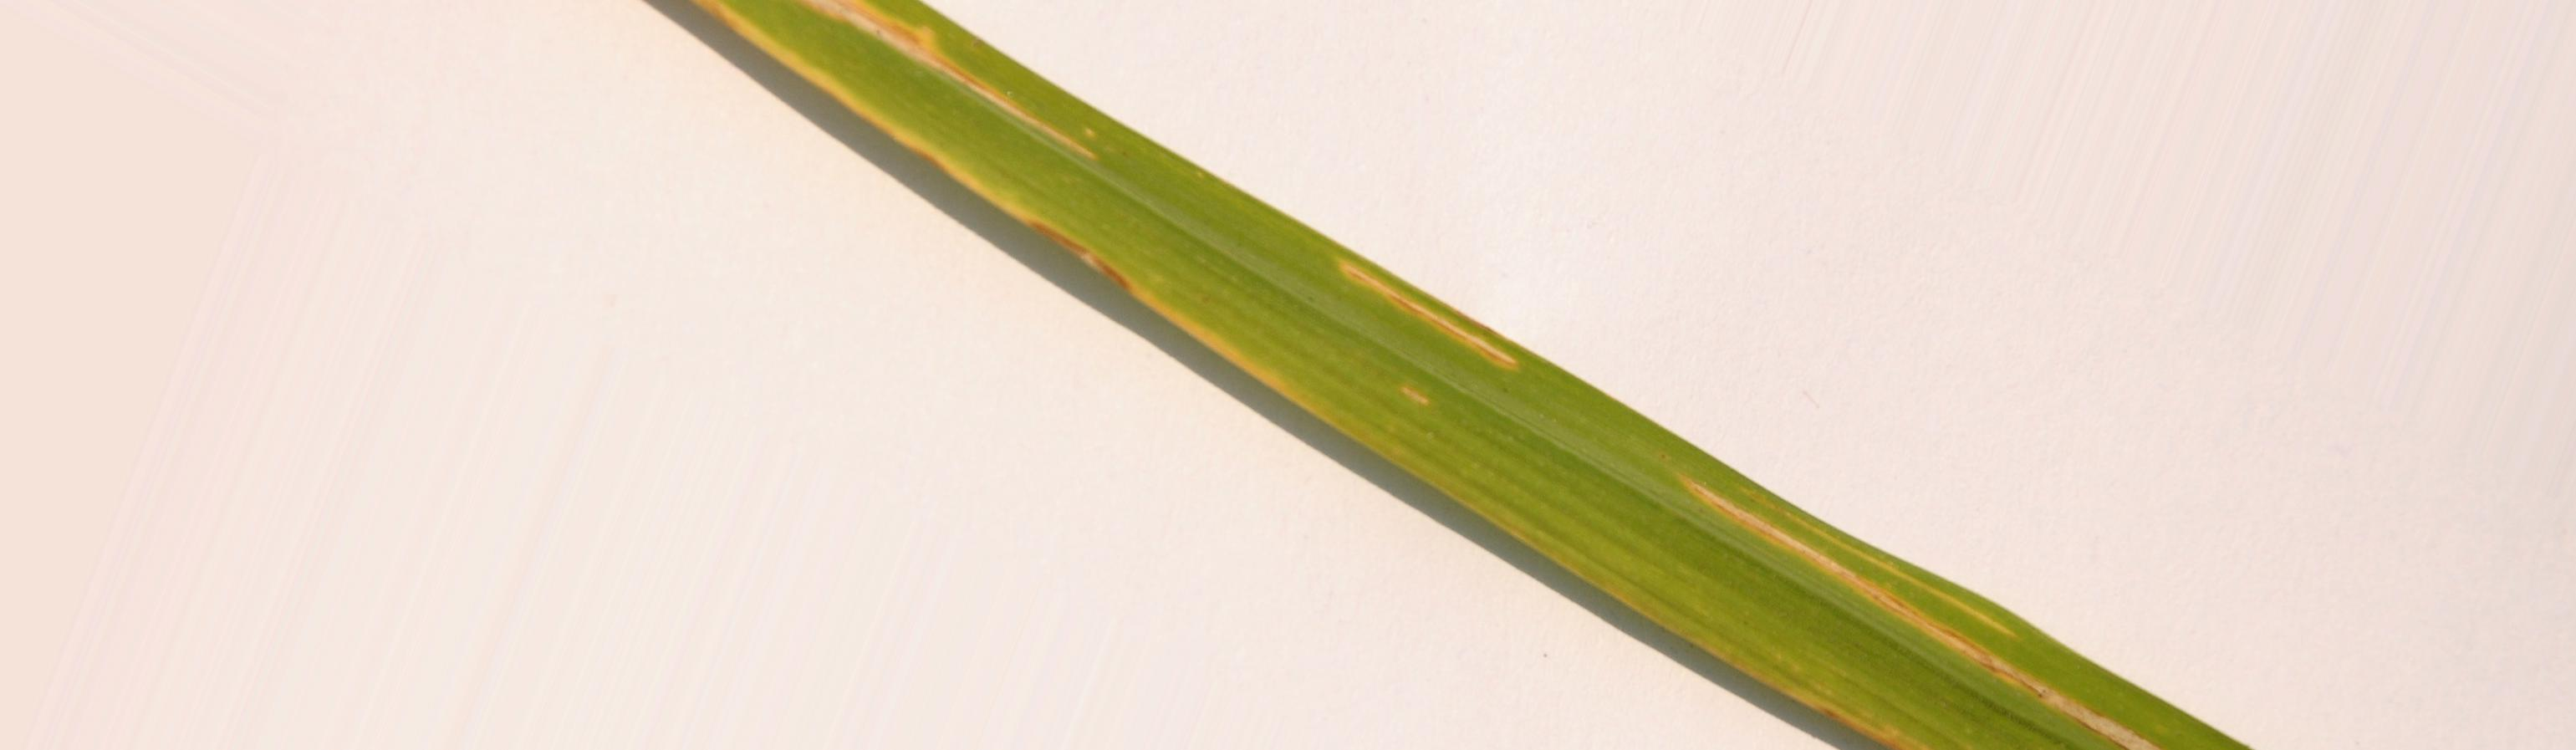

In [ ]:
Image(filenames[100])

In [ ]:
labels['disease'][100]

'Bacterial_leaf_blight'

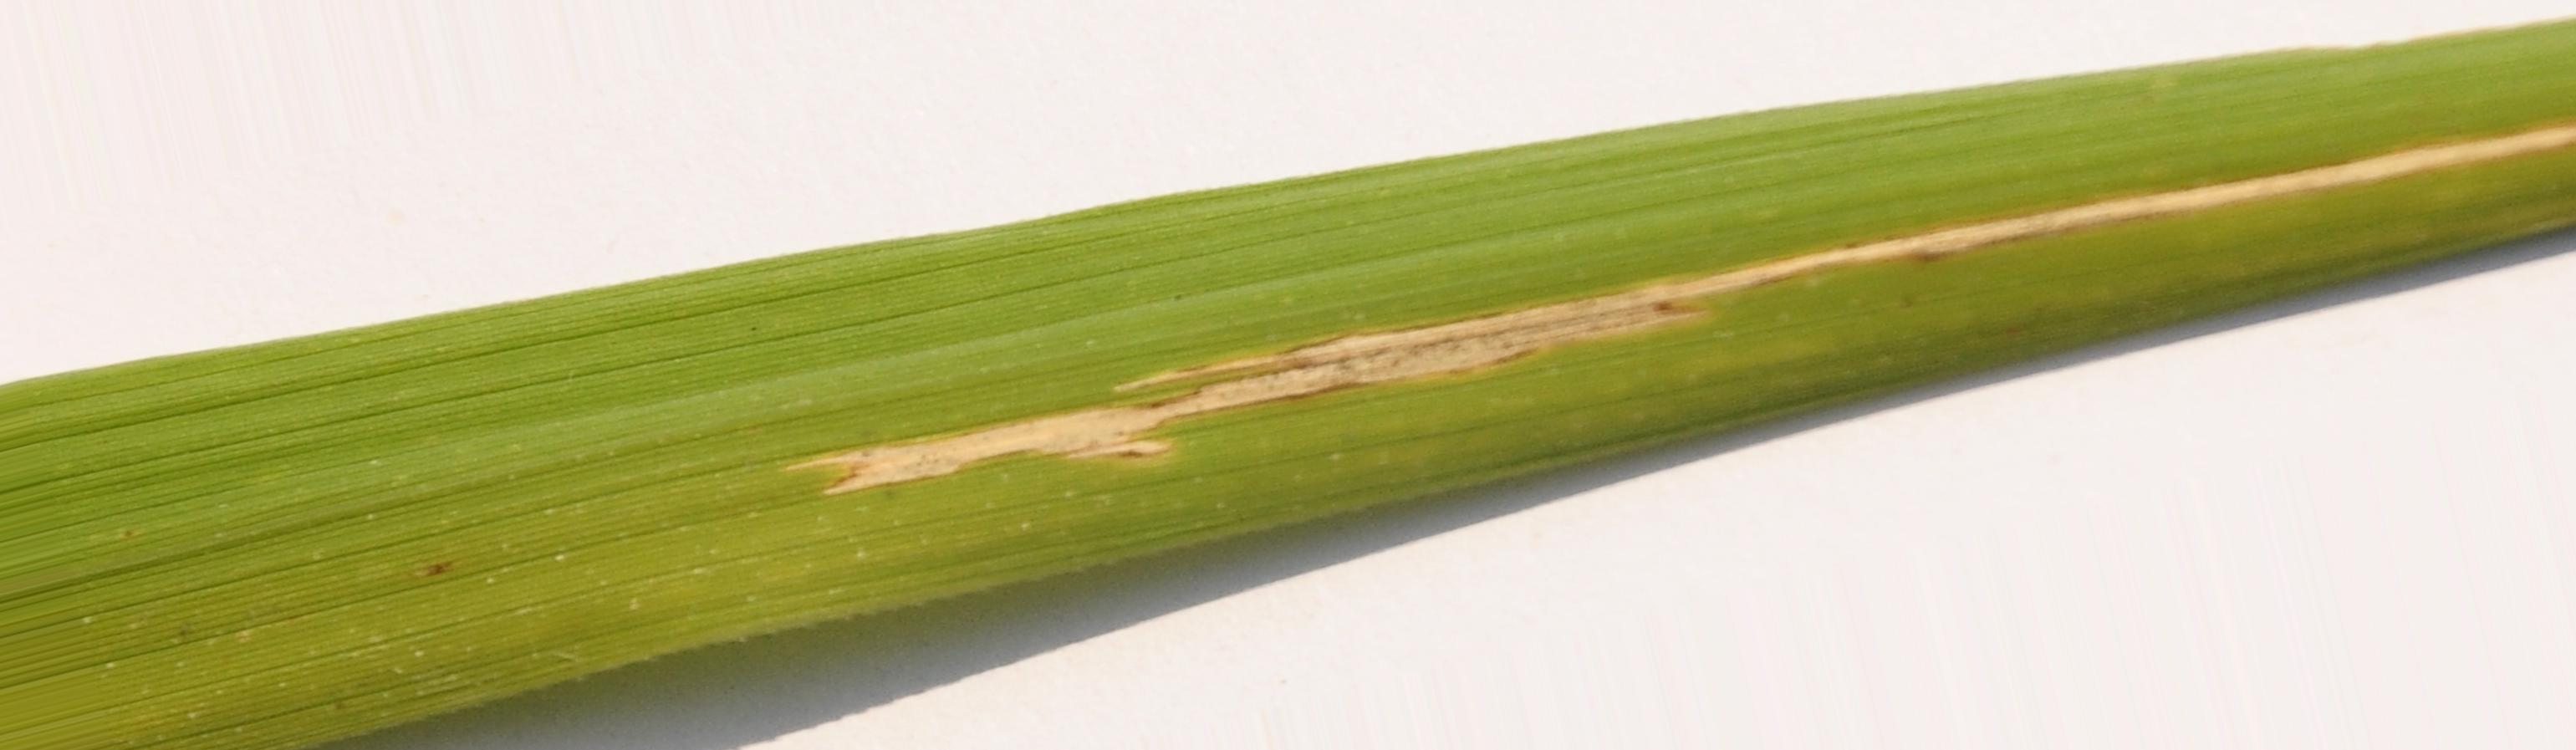

In [ ]:
Image(filenames[40])

In [ ]:
labels['disease'][40]

'Bacterial_leaf_blight'

In [ ]:
#Converting each of the labels into boolean

In [ ]:
labels

,filenames,disease
0,DSC_002.jpg,Bacterial_leaf_blight
1,DSC_003.JPG,Bacterial_leaf_blight
2,DSC_005.JPG,Bacterial_leaf_blight
3,DSC_006.JPG,Bacterial_leaf_blight
4,DSC_007.JPG,Bacterial_leaf_blight
...,...,...
2968,FSC_235.jpg,Leaf_smut
2969,FSC_236.jpg,Leaf_smut
2970,FSC_237.jpg,Leaf_smut
2971,FSC_238.jpg,Leaf_smut


In [ ]:
labels_1=np.array(labels['disease'])
labels_1

array(['Bacterial_leaf_blight', 'Bacterial_leaf_blight',
       'Bacterial_leaf_blight', ..., 'Leaf_smut', 'Leaf_smut',
       'Leaf_smut'], dtype=object)

In [ ]:
unique_labels=np.unique(labels_1)
unique_labels

array(['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'], dtype=object)

In [ ]:
#There are three unique labels in the label column


converting each of them into boolean

In [ ]:
labels_bol=[]

In [ ]:
for label in labels_1:
  labels_bol.append(label==unique_labels)

In [ ]:
labels_bol[:10]

[array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False])]

In [ ]:
len(labels_bol)

2973

## Splitting the data

We have already kept aside our test data,hence splitting the data into train and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=filenames
y=labels_bol

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.16,random_state=42)

In [ ]:
X_train[:10],y_train[:10]

(['drive/MyDrive/Rice Leaf/Labelled/FSC_0_1685.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/FSC_0_1903.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/ESC_0_8692.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/DSC_0_8850.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/DSC_0_7822.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/FSC_0_7036.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/FSC_0_6452.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/FSC_228.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/DSC_0_290.jpg',
  'drive/MyDrive/Rice Leaf/Labelled/ESC_0_9395.jpg'],
 [array([False, False,  True]),
  array([False, False,  True]),
  array([False,  True, False]),
  array([ True, False, False]),
  array([ True, False, False]),
  array([False, False,  True]),
  array([False, False,  True]),
  array([False, False,  True]),
  array([ True, False, False]),
  array([False,  True, False])])

In [ ]:
len(X_train),len(y_train),len(X_val),len(y_val)

(2497, 2497, 476, 476)

## Converting the images into tensors

In [ ]:
#function that converts image into tensor and the required size

IMG_SIZE=224
def process_image(image_path,img_size=IMG_SIZE):
  
  #reading the image
  image=tf.io.read_file(image_path)

  #turning the image into tensor
  image=tf.image.decode_jpeg(image,channels=3)

  #converting image color channel from 0-255 to 0-1 values         
  image=tf.image.convert_image_dtype(image,tf.float32)

  #resizing the image
  image=tf.image.resize(image,size=[img_size,img_size])

  return image                  
                             

In [ ]:
#function to map image with its assosciated label

def image_label(image_path,label):

  image=process_image(image_path)
  return (image,label)

converting all the images into batches of size 32


In [ ]:
batch_size=32

def create_data_batches(X,y=None,val_data=False,test_data=False,Batch_size=batch_size):

  if test_data:
    print('creating test data batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(Batch_size)
    return data_batch

  elif val_data:
    print('creating validation data batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X), #filenames
                                            tf.constant(y)))  #labels
    data_batch=data.map(image_label).batch(Batch_size)
    return data_batch

  else:
    print('creating train data batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    data_batch=data.map(image_label).batch(Batch_size)
    return data_batch



In [ ]:
train_data=create_data_batches(X_train,y_train)
val_data=create_data_batches(X_val,y_val,val_data=True)

creating train data batches
creating validation data batches


In [ ]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

Now we have all the images and labels in the form of batches as tensors

checking shape of X and y and dtypes

In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 3), dtype=tf.bool, name=None))

In [ ]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 3), dtype=tf.bool, name=None))

##Lets plot some images with labels from batches 

In [ ]:
def show_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_labels[labels[i].argmax()])
    plt.axis('off')

In [ ]:
#separating the labels and images

In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator())

In [ ]:
train_images[:2]

array([[[[0.67573637, 0.6443638 , 0.32671678],
         [0.65099794, 0.6196254 , 0.3019783 ],
         [0.62354696, 0.596096  , 0.24642321],
         ...,
         [0.9524951 , 0.9250441 , 0.8936716 ],
         [0.9613014 , 0.92992884, 0.91816413],
         [0.9568628 , 0.9215687 , 0.8862746 ]],

        [[0.68756455, 0.656192  , 0.3385449 ],
         [0.6745098 , 0.6431373 , 0.3254902 ],
         [0.66279763, 0.6314251 , 0.309909  ],
         ...,
         [0.9524951 , 0.9250441 , 0.8936716 ],
         [0.9613014 , 0.92992884, 0.91816413],
         [0.9568628 , 0.9215687 , 0.8862746 ]],

        [[0.713813  , 0.68244046, 0.36479342],
         [0.6902836 , 0.65891105, 0.341264  ],
         [0.68265873, 0.6493692 , 0.33555612],
         ...,
         [0.9568628 , 0.9294118 , 0.8980393 ],
         [0.9613014 , 0.92992884, 0.91816413],
         [0.9568628 , 0.9215687 , 0.8862746 ]],

        ...,

        [[0.96470594, 0.93725497, 0.91372555],
         [0.96470594, 0.93725497, 0.91372555]

In [ ]:
train_labels[:2]

array([[False, False,  True],
       [False, False,  True]])

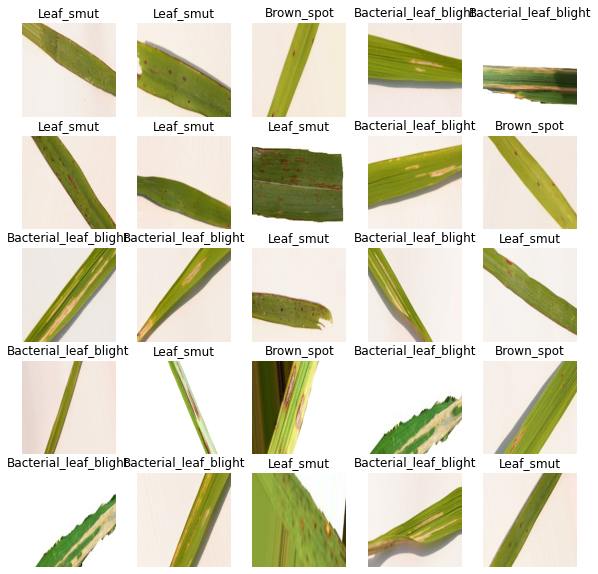

In [ ]:
show_images(train_images,train_labels)

# Model building

As we are done with data preprocessing part,Lets try out some different models and depending upon the performance of each model,we will decide the final model for predictions. 

In [ ]:
#setting up the input shape,output shape and Earlystopping

INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

OUTPUT_SHAPE=len(unique_labels)

#Earlystopping

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=3)



### MobileNetV2

In [ ]:
#Model URL for MobileNetV2

Model1_URL= 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [ ]:
#creating model 
model1=tf.keras.Sequential([
          #input layer
          hub.KerasLayer(Model1_URL),
          
          #output layer   
          tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation='softmax')  
                                   ])

#compiling the model
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#building the model                                            
model1.build(INPUT_SHAPE)            

#model summary
model1.summary()                                                

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 5,435,719
Trainable params: 3,006
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
fit_1=model1.fit(train_data,
                epochs=100,
                validation_data=val_data,
                callbacks=[early_stopping])

Epoch 1/100
79/79 [==============================] - 75s 766ms/step - loss: 0.4346 - accuracy: 0.8330 - val_loss: 0.1425 - val_accuracy: 0.9538
Epoch 2/100
79/79 [==============================] - 72s 915ms/step - loss: 0.1103 - accuracy: 0.9764 - val_loss: 0.0889 - val_accuracy: 0.9790
Epoch 3/100
79/79 [==============================] - 55s 692ms/step - loss: 0.0681 - accuracy: 0.9892 - val_loss: 0.0708 - val_accuracy: 0.9790
Epoch 4/100
79/79 [==============================] - 68s 865ms/step - loss: 0.0494 - accuracy: 0.9936 - val_loss: 0.0599 - val_accuracy: 0.9832
Epoch 5/100
79/79 [==============================] - 60s 763ms/step - loss: 0.0383 - accuracy: 0.9948 - val_loss: 0.0517 - val_accuracy: 0.9832
Epoch 6/100
79/79 [==============================] - 73s 922ms/step - loss: 0.0308 - accuracy: 0.9972 - val_loss: 0.0456 - val_accuracy: 0.9853
Epoch 7/100
79/79 [==============================] - 67s 846ms/step - loss: 0.0255 - accuracy: 0.9980 - val_loss: 0.0409 - val_accuracy:

## EfficientNetV2

In [ ]:
#URL for model 2
model2_URL='https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2'


In [ ]:
model2=tf.keras.Sequential([
         #input layer
         hub.KerasLayer(model2_URL), 

         #outputlayer
         tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                               activation='softmax')                  
])

#compiling the model

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics='accuracy')

#building the model

model2.build(INPUT_SHAPE)

#summary of model

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1000)              7200312   
                                                                 
 dense_2 (Dense)             (None, 3)                 3003      
                                                                 
Total params: 7,203,315
Trainable params: 3,003
Non-trainable params: 7,200,312
_________________________________________________________________


In [ ]:
fit_2=model2.fit(train_data,
                epochs=100,
                validation_data=val_data,
                callbacks=[early_stopping])

Epoch 1/100
79/79 [==============================] - 97s 1s/step - loss: 0.6044 - accuracy: 0.7821 - val_loss: 0.2882 - val_accuracy: 0.9202
Epoch 2/100
79/79 [==============================] - 55s 694ms/step - loss: 0.2357 - accuracy: 0.9419 - val_loss: 0.1912 - val_accuracy: 0.9517
Epoch 3/100
79/79 [==============================] - 55s 695ms/step - loss: 0.1626 - accuracy: 0.9628 - val_loss: 0.1466 - val_accuracy: 0.9559
Epoch 4/100
79/79 [==============================] - 55s 693ms/step - loss: 0.1244 - accuracy: 0.9712 - val_loss: 0.1178 - val_accuracy: 0.9748
Epoch 5/100
79/79 [==============================] - 68s 859ms/step - loss: 0.1006 - accuracy: 0.9772 - val_loss: 0.0976 - val_accuracy: 0.9790
Epoch 6/100
79/79 [==============================] - 66s 830ms/step - loss: 0.0844 - accuracy: 0.9844 - val_loss: 0.0829 - val_accuracy: 0.9811
Epoch 7/100
79/79 [==============================] - 55s 700ms/step - loss: 0.0726 - accuracy: 0.9848 - val_loss: 0.0719 - val_accuracy: 0.

## ResNet50V1

In [ ]:
model3_url= "https://tfhub.dev/tensorflow/resnet_50/classification/1"

In [ ]:
model3=tf.keras.Sequential([
                            
         #input layer
         hub.KerasLayer(model3_url),

         #output layer
         tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                        activation='softmax')                   
])

#compiling the model
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
#building the model

model3.build(INPUT_SHAPE)

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              25612201  
                                                                 
 dense_3 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 25,615,207
Trainable params: 3,006
Non-trainable params: 25,612,201
_________________________________________________________________


In [ ]:
fit_3=model3.fit(train_data,
                 epochs=100,
                 callbacks=[early_stopping],
                 validation_data=val_data)

Epoch 1/100
79/79 [==============================] - 66s 729ms/step - loss: 1.0876 - accuracy: 0.5667 - val_loss: 1.0795 - val_accuracy: 0.6597
Epoch 2/100
79/79 [==============================] - 56s 709ms/step - loss: 1.0692 - accuracy: 0.7008 - val_loss: 1.0621 - val_accuracy: 0.7101
Epoch 3/100
79/79 [==============================] - 55s 696ms/step - loss: 1.0518 - accuracy: 0.7157 - val_loss: 1.0456 - val_accuracy: 0.7311
Epoch 4/100
79/79 [==============================] - 56s 700ms/step - loss: 1.0350 - accuracy: 0.7265 - val_loss: 1.0298 - val_accuracy: 0.7458
Epoch 5/100
79/79 [==============================] - 56s 702ms/step - loss: 1.0188 - accuracy: 0.7337 - val_loss: 1.0146 - val_accuracy: 0.7458
Epoch 6/100
79/79 [==============================] - 57s 717ms/step - loss: 1.0032 - accuracy: 0.7409 - val_loss: 1.0000 - val_accuracy: 0.7437
Epoch 7/100
79/79 [==============================] - 57s 715ms/step - loss: 0.9881 - accuracy: 0.7473 - val_loss: 0.9859 - val_accuracy:

## InceptionV3

In [ ]:
model4_url='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5'

In [ ]:
model4=tf.keras.Sequential([
                            
             #input layer
             hub.KerasLayer(model4_url),

             #output_layer
             tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation='softmax')         ])

#compiling the model
model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#building the model
model4.build(INPUT_SHAPE)

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 21,808,931
Trainable params: 6,147
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
fit_4=model4.fit(train_data,validation_data=val_data,
                 callbacks=[early_stopping],epochs=100)

Epoch 1/100
79/79 [==============================] - 64s 714ms/step - loss: 0.5060 - accuracy: 0.7966 - val_loss: 0.2483 - val_accuracy: 0.9118
Epoch 2/100
79/79 [==============================] - 56s 704ms/step - loss: 0.1999 - accuracy: 0.9447 - val_loss: 0.1704 - val_accuracy: 0.9538
Epoch 3/100
79/79 [==============================] - 56s 712ms/step - loss: 0.1367 - accuracy: 0.9668 - val_loss: 0.1343 - val_accuracy: 0.9643
Epoch 4/100
79/79 [==============================] - 59s 751ms/step - loss: 0.1033 - accuracy: 0.9796 - val_loss: 0.1140 - val_accuracy: 0.9811
Epoch 5/100
79/79 [==============================] - 56s 703ms/step - loss: 0.0821 - accuracy: 0.9872 - val_loss: 0.1000 - val_accuracy: 0.9811
Epoch 6/100
79/79 [==============================] - 56s 703ms/step - loss: 0.0676 - accuracy: 0.9900 - val_loss: 0.0896 - val_accuracy: 0.9811
Epoch 7/100
79/79 [==============================] - 55s 698ms/step - loss: 0.0569 - accuracy: 0.9928 - val_loss: 0.0817 - val_accuracy:

###Visualizing each of the model's performance

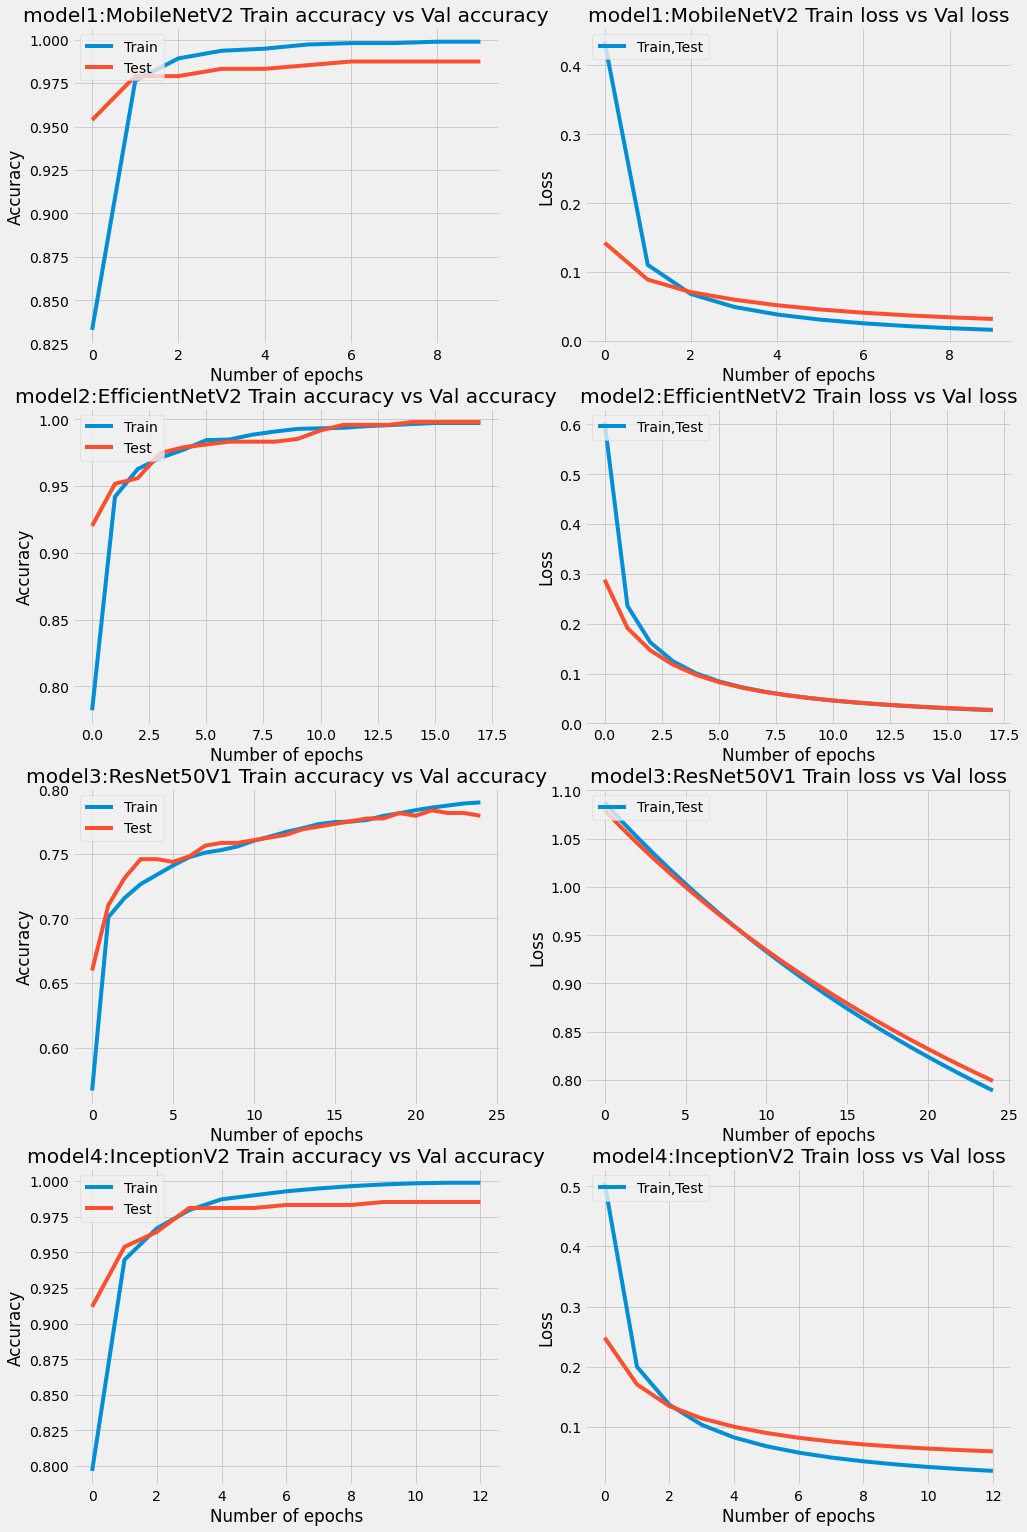

In [ ]:
#plotting the accuracy and loss of each model

fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(15,25))
#plt.tight_layout()
plt.style.use('fivethirtyeight')

#model1 

#Accuracy
axes[0][0].plot(fit_1.history['accuracy'])
axes[0][0].plot(fit_1.history['val_accuracy'])
axes[0][0].set_ylabel('Accuracy')
axes[0][0].set_xlabel('Number of epochs')
axes[0][0].set_title('model1:MobileNetV2 Train accuracy vs Val accuracy')
axes[0][0].legend(['Train','Test'],loc='upper left')

#Loss
axes[0][1].plot(fit_1.history['loss'])
axes[0][1].plot(fit_1.history['val_loss'])
axes[0][1].set_title('model1:MobileNetV2 Train loss vs Val loss')
axes[0][1].set_xlabel('Number of epochs')
axes[0][1].set_ylabel('Loss')
axes[0][1].legend(['Train,Test'],loc='upper left')

#model2 

#Accuracy
axes[1][0].plot(fit_2.history['accuracy'])
axes[1][0].plot(fit_2.history['val_accuracy'])
axes[1][0].set_ylabel('Accuracy')
axes[1][0].set_xlabel('Number of epochs')
axes[1][0].set_title('model2:EfficientNetV2 Train accuracy vs Val accuracy')
axes[1][0].legend(['Train','Test'],loc='upper left')

#Loss
axes[1][1].plot(fit_2.history['loss'])
axes[1][1].plot(fit_2.history['val_loss'])
axes[1][1].set_title('model2:EfficientNetV2 Train loss vs Val loss')
axes[1][1].set_xlabel('Number of epochs')
axes[1][1].set_ylabel('Loss')
axes[1][1].legend(['Train,Test'],loc='upper left')

#model3

#Accuracy
axes[2][0].plot(fit_3.history['accuracy'])
axes[2][0].plot(fit_3.history['val_accuracy'])
axes[2][0].set_ylabel('Accuracy')
axes[2][0].set_xlabel('Number of epochs')
axes[2][0].set_title('model3:ResNet50V1 Train accuracy vs Val accuracy')
axes[2][0].legend(['Train','Test'],loc='upper left')

#Loss
axes[2][1].plot(fit_3.history['loss'])
axes[2][1].plot(fit_3.history['val_loss'])
axes[2][1].set_title('model3:ResNet50V1 Train loss vs Val loss')
axes[2][1].set_xlabel('Number of epochs')
axes[2][1].set_ylabel('Loss')
axes[2][1].legend(['Train,Test'],loc='upper left')

#model4

#Accuracy
axes[3][0].plot(fit_4.history['accuracy'])
axes[3][0].plot(fit_4.history['val_accuracy'])
axes[3][0].set_ylabel('Accuracy')
axes[3][0].set_xlabel('Number of epochs')
axes[3][0].set_title('model4:InceptionV2 Train accuracy vs Val accuracy')
axes[3][0].legend(['Train','Test'],loc='upper left')

#Loss
axes[3][1].plot(fit_4.history['loss'])
axes[3][1].plot(fit_4.history['val_loss'])
axes[3][1].set_title('model4:InceptionV2 Train loss vs Val loss')
axes[3][1].set_xlabel('Number of epochs')
axes[3][1].set_ylabel('Loss')
axes[3][1].legend(['Train,Test'],loc='upper left')





The EfficientNetV2 is performing better than other models but it willnot generalize well as it is overfitting,Since MobileNetV2 has better accuracy and loss than other 2 models we will be using this model for making final predictions

### Creating a function to save and load our trained model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  #Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Rice Leaf /models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
import datetime

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

### MobileNetV2(final model)

In [ ]:
#building the final model

final_model=tf.keras.Sequential([
                                 
           hub.KerasLayer(Model1_URL),

           tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation='softmax')                      
])

final_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.Adam())

final_model.build(INPUT_SHAPE)

final_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 3)                 3006      
                                                                 
Total params: 5,435,719
Trainable params: 3,006
Non-trainable params: 5,432,713
_________________________________________________________________


Now that we have decided our final model,Lets train it with full training data

In [ ]:
full_data=create_data_batches(X,y)

creating train data batches


In [ ]:
final_fit=final_model.fit(full_data,epochs=38)

Epoch 1/38
93/93 [==============================] - 99s 908ms/step - loss: 1.8480 - accuracy: 0.7588
Epoch 2/38
93/93 [==============================] - 57s 608ms/step - loss: 2.6787 - accuracy: 0.6821
Epoch 3/38
93/93 [==============================] - 58s 617ms/step - loss: 0.7474 - accuracy: 0.8177
Epoch 4/38
93/93 [==============================] - 57s 607ms/step - loss: 0.4587 - accuracy: 0.8692
Epoch 5/38
93/93 [==============================] - 55s 590ms/step - loss: 0.3029 - accuracy: 0.9041
Epoch 6/38
93/93 [==============================] - 55s 591ms/step - loss: 0.2177 - accuracy: 0.9277
Epoch 7/38
93/93 [==============================] - 56s 597ms/step - loss: 0.1615 - accuracy: 0.9475
Epoch 8/38
93/93 [==============================] - 55s 591ms/step - loss: 0.1226 - accuracy: 0.9563
Epoch 9/38
93/93 [==============================] - 55s 590ms/step - loss: 0.0961 - accuracy: 0.9654
Epoch 10/38
93/93 [==============================] - 56s 593ms/step - loss: 0.0781 - accura

Lets save this model to avoid training it once again

In [ ]:
save_model(final_model,suffix='trained')

Saving model to: drive/MyDrive/Rice Leaf /models/20220224-18001645725652-trained.h5...


'drive/MyDrive/Rice Leaf /models/20220224-18001645725652-trained.h5'

loading the saved model

In [ ]:
loaded_model=load_model('/content/drive/MyDrive/Rice_Leaf /models/20220224-18001645725652-trained.h5')


Loading saved model from: /content/drive/MyDrive/Rice_Leaf /models/20220224-18001645725652-trained.h5


As we are done with training the model with full data,lets convert our test data to batches as well

In [ ]:
test_labels=pd.read_csv('drive/MyDrive/Rice Leaf/test_labels.csv')

In [ ]:
test_labels

,fileame,Disease
0,DSC_001.JPG,Bacterial_leaf_blight
1,DSC_004.jpg,Bacterial_leaf_blight
2,DSC_009.JPG,Bacterial_leaf_blight
3,DSC_011.JPG,Bacterial_leaf_blight
4,DSC_016.JPG,Bacterial_leaf_blight
5,DSC_018.jpg,Bacterial_leaf_blight
6,DSC_019.JPG,Bacterial_leaf_blight
7,DSC_024.JPG,Bacterial_leaf_blight
8,DSC_025.JPG,Bacterial_leaf_blight
9,DSC_029.JPG,Bacterial_leaf_blight


In [ ]:
test_names=test_labels['fileame']

In [ ]:
test_path='drive/MyDrive/Rice Leaf/Test/'
test_file_names=[test_path + fname for fname in test_names]

In [ ]:
test_file_names

['drive/MyDrive/Rice Leaf/Test/DSC_001.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_004.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_009.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_011.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_016.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_018.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_019.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_024.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_025.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_029.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_031.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_033.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_038.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_105.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_108.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_110.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_115.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_120.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_122.jpg',
 'drive/MyDrive/Rice Leaf/Test/DSC_126.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_130.JPG',
 'drive/MyDrive/Rice Leaf/Test/DSC_132.JPG',
 'drive/My

In [ ]:
test_data=create_data_batches(test_file_names,test_data=True)

creating test data batches


## Prediction

In [ ]:
predictions=loaded_model.predict(test_data)

Since the predicted labels are in boolean form,lets convert them into actual label names.

In [ ]:
#converting the predictions into labels
predicted_labels=[unique_labels[np.argmax(predictions[i])] for i in range(len(predictions))]

In [ ]:
predicted_labels[:5]

['Bacterial_leaf_blight',
 'Bacterial_leaf_blight',
 'Bacterial_leaf_blight',
 'Bacterial_leaf_blight',
 'Bacterial_leaf_blight']

In [ ]:
test_labels.head()

,fileame,Disease
0,DSC_001.JPG,Bacterial_leaf_blight
1,DSC_004.jpg,Bacterial_leaf_blight
2,DSC_009.JPG,Bacterial_leaf_blight
3,DSC_011.JPG,Bacterial_leaf_blight
4,DSC_016.JPG,Bacterial_leaf_blight


In [ ]:
true_labels=test_labels['Disease']
true_labels[:5]

0    Bacterial_leaf_blight
1    Bacterial_leaf_blight
2    Bacterial_leaf_blight
3    Bacterial_leaf_blight
4    Bacterial_leaf_blight
Name: Disease, dtype: object

## Evaluation

In [ ]:
#importing the necessaray metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score

Accuracy score

In [ ]:
score=accuracy_score(true_labels,predicted_labels)
print(f'Accuracy score is : {round(score,4)*100}%')

Accuracy score is : 92.31%


As we can see the model has correctly classified 92% of the test images i.e approximately 35 images out of 39 images which is an excellent score.

Classification Report

In [ ]:
report=classification_report(true_labels,predicted_labels)

In [ ]:
print(report)

                       precision    recall  f1-score   support

Bacterial_leaf_blight       0.93      1.00      0.96        13
           Brown_spot       1.00      0.77      0.87        13
            Leaf_smut       0.87      1.00      0.93        13

             accuracy                           0.92        39
            macro avg       0.93      0.92      0.92        39
         weighted avg       0.93      0.92      0.92        39



* All the Bacterial leaf blight and Leaf smut images were correctly classified to their particular class.
* Aprroximately 1 or 2 images were wrongly classified from Brown spot disease.

Lets visualize each of the test image and acutal label with predicted label 

In [ ]:
#function to convert prediction probabilitiy to a label
def get_pred_label(predictions):
  return unique_labels[np.argmax(predictions)]

since the test images are in batch format,unbatching them so that they can be plotted.

In [ ]:
images_=[]

for image in test_data.unbatch().as_numpy_iterator():
  images_.append(image)

In [ ]:
images_[:1]

[array([[[0.89655995, 0.84557956, 0.82205015],
         [0.8882266 , 0.83724624, 0.8058737 ],
         [0.88452923, 0.83332664, 0.8104639 ],
         ...,
         [0.8980393 , 0.8470589 , 0.8235295 ],
         [0.9005258 , 0.8485114 , 0.81765586],
         [0.89168197, 0.8470589 , 0.8235295 ]],
 
        [[0.882353  , 0.83921576, 0.81568635],
         [0.8882091 , 0.8372287 , 0.80585617],
         [0.89416426, 0.8387693 , 0.8174472 ],
         ...,
         [0.8984854 , 0.84750503, 0.8239756 ],
         [0.8867916 , 0.8460249 , 0.81124777],
         [0.9000263 , 0.84361243, 0.81495667]],
 
        [[0.8863621 , 0.83921576, 0.81568635],
         [0.8941177 , 0.8431373 , 0.8117648 ],
         [0.8941177 , 0.8352942 , 0.8116773 ],
         ...,
         [0.8903267 , 0.8433554 , 0.819826  ],
         [0.8947107 , 0.8487232 , 0.8191669 ],
         [0.9061132 , 0.84433126, 0.8168803 ]],
 
        ...,
 
        [[0.88827914, 0.8451419 , 0.8216125 ],
         [0.89211315, 0.84113276, 0.80976

In [ ]:
def plot_pred(predictions,labels,images,n=1):

  pred_prob,truth_label,image=predictions[n],labels[n],images[n]

  pred_label=get_pred_label(pred_prob)

  #plotting the image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Red colourif its wrongly classified
  if pred_label==truth_label:
    color="green"
  else:
    color="red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    truth_label),
                                    color=color)

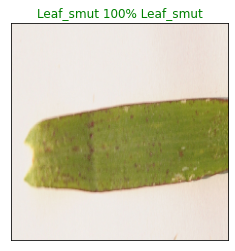

In [ ]:
plot_pred(predictions,true_labels,images_,n=30)

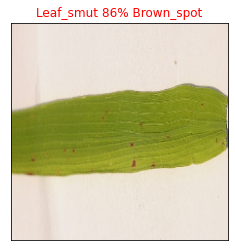

In [ ]:
plot_pred(predictions,true_labels,images_,n=20)

The model predicted it as Leaf smut disease but it was actually a Brown spot disease

In [ ]:
#plots the confidence intervals of each class for a particular image
def plot_preds(predictions, true_labels, n=1):
  pred_prob, true_label = predictions[n], true_labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # confidence interval's index
  pred_indexes= pred_prob.argsort()[::-1]
  #confidence values
  pred_values = pred_prob[pred_indexes]
  # Find the top 10 prediction labels
  pred_labels = unique_labels[pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(pred_labels)),
                     pred_values,
                     color="grey")
  plt.xticks(np.arange(len(pred_labels)),
             labels=pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label,pred_labels):
    top_plot[np.argmax(pred_labels == true_label)].set_color("green")
  else:
    pass

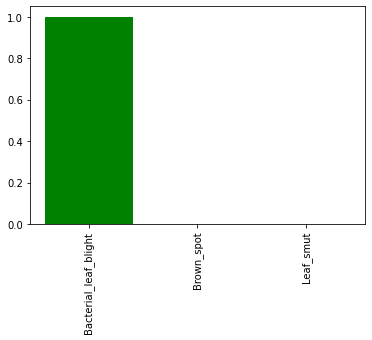

In [ ]:
plot_preds(predictions,true_labels,n=5)

Lets visualize some predictions along with theiractual label and predicted labels

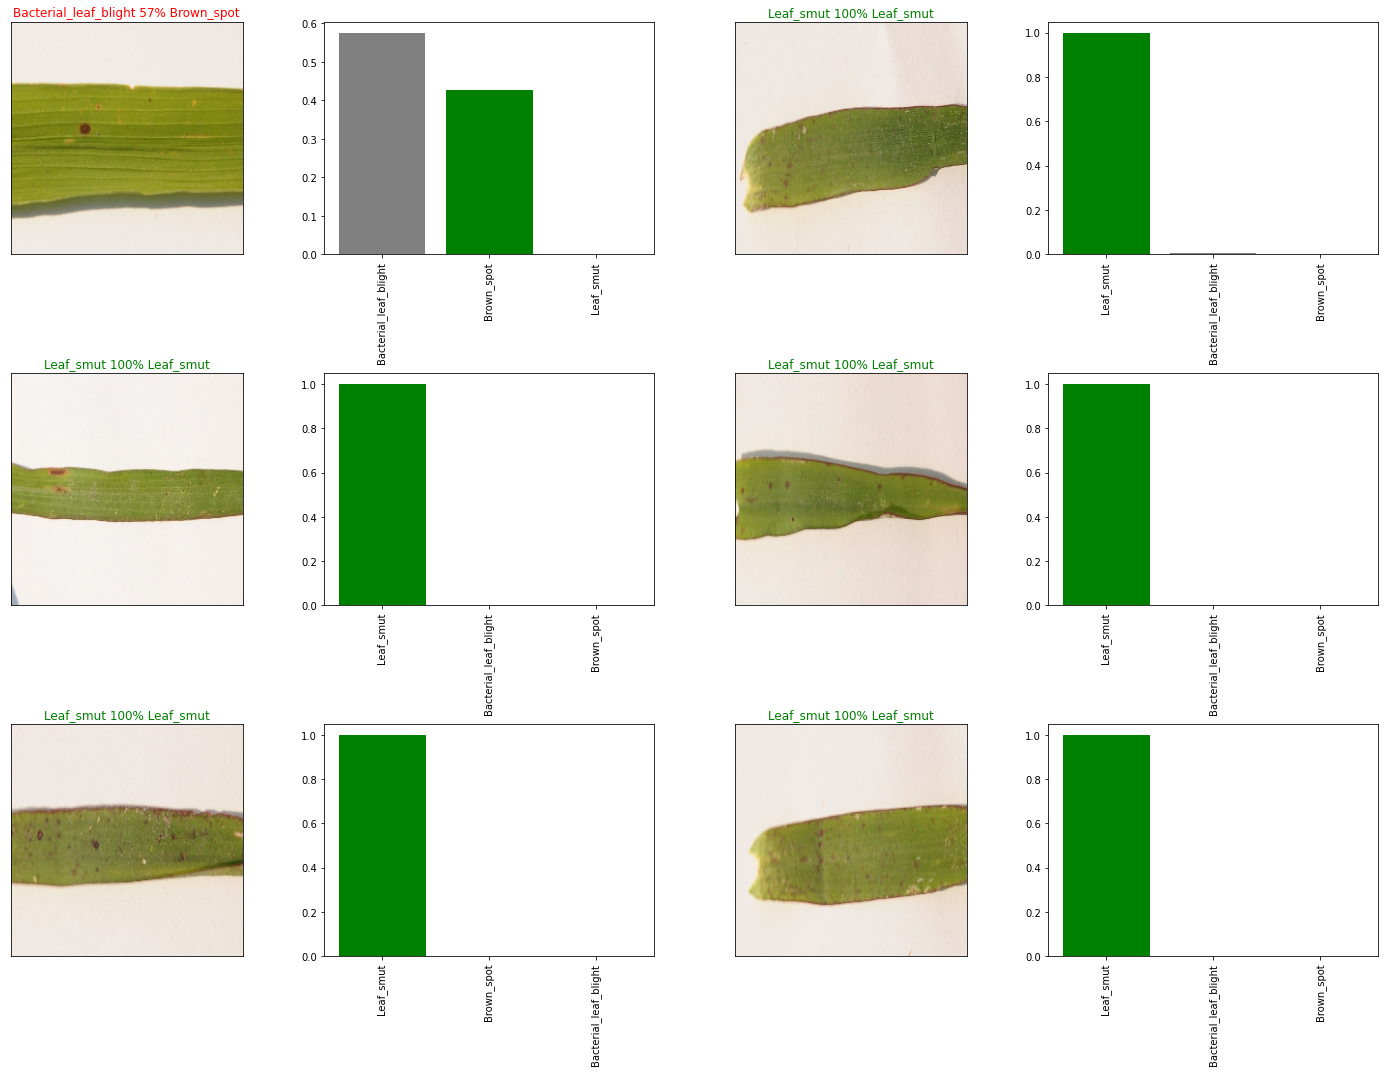

In [ ]:
i_multiplier = 25
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions,
            true_labels,
            images=images_,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_preds(predictions,
            true_labels,
            n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

* As we can see the model is almost 100% accurate on the predicted labels.
* In one of the above case model has predicted Bacterial leaf blight where the actual label was brown spot which implies probability error is not that much high on wrong classifications as well.

# Conclusion

In this project we followed every step of a deep learning pipeline starting with data augmentation then converting the image into tensors followed by creating the batches and at last building the model and making predictions.<br />The objective was to predict the type of Rice leaf disease,at the end which was done with 92% accuracy.Out of 39 images 36 images were classified correctly.<br />
At the beginning the images were very less hence the data augmentation was done on training data to generate more training images.We tried out few models and evaluated their performance and decided to use MobileNetV2 as the final model for our predictions.And the model gave the best possible results with 92% accuracy and recall score of approximately 90% which is good enough.